In [1]:
import pandas as pd #
import numpy as np #
import re #
import nltk #

import matplotlib.pyplot as plt #


from nltk.stem.porter import PorterStemmer #
from sklearn.feature_extraction.text import TfidfVectorizer #
from sklearn import decomposition #
from sklearn.decomposition import NMF
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn.metrics import silhouette_score, accuracy_score
# from sklearn.preprocessing import normalize
# from scipy.sparse import SparseEfficiencyWarning
from sklearn.model_selection import train_test_split #


In [2]:
# nltk.download('punkt')
# nltk.download('stopwords')

In [3]:
train_df = pd.read_csv('data/BBC News Train.csv')

In [4]:
train_df.head(3)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.1+ KB


In [6]:
train_df['Category'].value_counts()

Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

complaints -> Text

In [7]:
stemmer = nltk.stem.SnowballStemmer('english')
stop_words = set(nltk.corpus.stopwords.words('english'))

In [8]:
# function to remove duplicates (run this before tokenization)
def remove_duplicates(df: pd.DataFrame) -> pd.DataFrame:
    # number of duplicates
    number_duplicates = df['Text'].duplicated().sum()

    # print no. duplicates
    print(f'No. of duplicate articles: {number_duplicates}' '\n')

    # removal
    df_cleaned = df.drop_duplicates(subset = ['Text'])

    return df_cleaned

# function to remove non-alphabetical characters (integrated into tokenize function)
def remove_non_alpha(text):
    
    return re.sub(r'[^a-zA-Z\s]', '', text)
    
# function for cleaning, rather than using defaults
def tokenize(text):
    
    text = remove_non_alpha(text)
    
    tokens = [word for word in nltk.word_tokenize(text) if (len(word)) > 3]
    tokens = map(str.lower, tokens)
    stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
    return stems

In [9]:
train_df = remove_duplicates(train_df)

No. of duplicate articles: 50



In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1440 non-null   int64 
 1   Text       1440 non-null   object
 2   Category   1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.0+ KB


Category
sport            0.237500
business         0.232639
politics         0.184722
entertainment    0.182639
tech             0.162500
Name: count, dtype: float64 



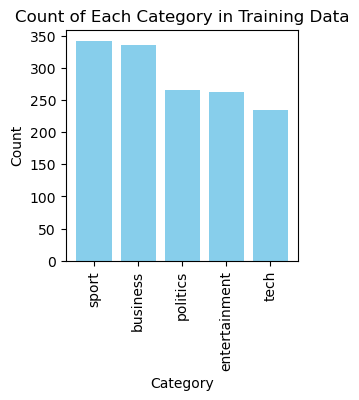

In [11]:
category_counts = train_df['Category'].value_counts()
category_prop = category_counts / category_counts.sum()
print(category_prop, '\n')

plt.figure(figsize=(3, 3))
plt.bar(category_counts.index, 
        category_counts.values, 
        color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category in Training Data')
plt.xticks(rotation=90)
plt.show()

In [12]:
vectorizer = (TfidfVectorizer(tokenizer = tokenize, 
                              stop_words = None,
                              max_df = 0.75, # max freq of word in documents
                              max_features = 1000,
                              lowercase = False,
                              ngram_range = (1, 2),
                              token_pattern = None) # turn off token warning 
              )

In [13]:
tfidf_vectors = vectorizer.fit_transform(train_df.Text)

In [14]:
tfidf_dense = tfidf_vectors.toarray()
tfidf_dense

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.04267657, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
vectorizer.get_feature_names_out()

array(['abil', 'abl', 'academi', 'accept', 'access', 'accord', 'account',
       'accus', 'achiev', 'across', 'act', 'action', 'activ', 'actor',
       'actress', 'actual', 'ad', 'address', 'admit', 'affair', 'affect',
       'africa', 'agenc', 'agre', 'agreement', 'ahead', 'aim', 'airlin',
       'alan', 'album', 'alleg', 'allow', 'almost', 'along', 'alreadi',
       'also', 'although', 'alway', 'america', 'american', 'among',
       'amount', 'analyst', 'andi', 'andrew', 'announc', 'annual',
       'anoth', 'answer', 'anyth', 'appeal', 'appear', 'appl', 'approach',
       'approv', 'april', 'area', 'argu', 'around', 'arrest', 'arsenal',
       'artist', 'ask', 'associ', 'asylum', 'athlet', 'attack', 'attempt',
       'attend', 'attract', 'audienc', 'august', 'australia',
       'australian', 'author', 'avail', 'averag', 'aviat', 'avoid',
       'award', 'away', 'back', 'ball', 'band', 'bank', 'bankruptci',
       'base', 'battl', 'beat', 'becam', 'becom', 'began', 'begin',
       'be

In [16]:
clf = decomposition.NMF(n_components = 5, random_state = 5510)

W1 = clf.fit_transform(tfidf_vectors)
H1 = clf.components_

In [17]:
H1
# video: 16:35 - purpose of H matrix

array([[0.00706835, 0.02322076, 0.        , ..., 0.00101558, 0.20833   ,
        0.        ],
       [0.0191114 , 0.04376838, 0.        , ..., 0.06309314, 0.        ,
        0.09737726],
       [0.00046556, 0.01314041, 0.1653791 , ..., 0.05862453, 0.        ,
        0.00219892],
       [0.01967965, 0.02644301, 0.        , ..., 0.0338002 , 0.        ,
        0.00080533],
       [0.03129457, 0.07943872, 0.        , ..., 0.01823562, 0.        ,
        0.        ]])

In [18]:
W1
# video: 17:00 - purpose of W matrix

array([[0.07297336, 0.00626784, 0.00787878, 0.00976555, 0.00832369],
       [0.14131038, 0.        , 0.        , 0.        , 0.        ],
       [0.07385788, 0.00856261, 0.00059452, 0.04663296, 0.02655899],
       ...,
       [0.12418545, 0.01193007, 0.0024818 , 0.        , 0.        ],
       [0.01971198, 0.        , 0.01629529, 0.        , 0.24374197],
       [0.        , 0.        , 0.        , 0.        , 0.15528962]])

In [19]:
num_words = 15

vocab = np.array(vectorizer.get_feature_names_out())

top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]]
topic_words = ([top_words(t) for t in H1])
topics = [' '.join(t) for t in topic_words]

In [20]:
topics

['market firm compani sale growth year bank share profit economi price rate econom china trade',
 'game play england player match champion team injuri wale side ireland first club coach world',
 'film award best star actor nomin oscar actress director festiv movi includ music comedi year',
 'labour elect blair parti tori brown minist govern would prime prime minist howard lord campaign chancellor',
 'mobil phone peopl technolog music use servic user comput softwar digit network broadband game microsoft']

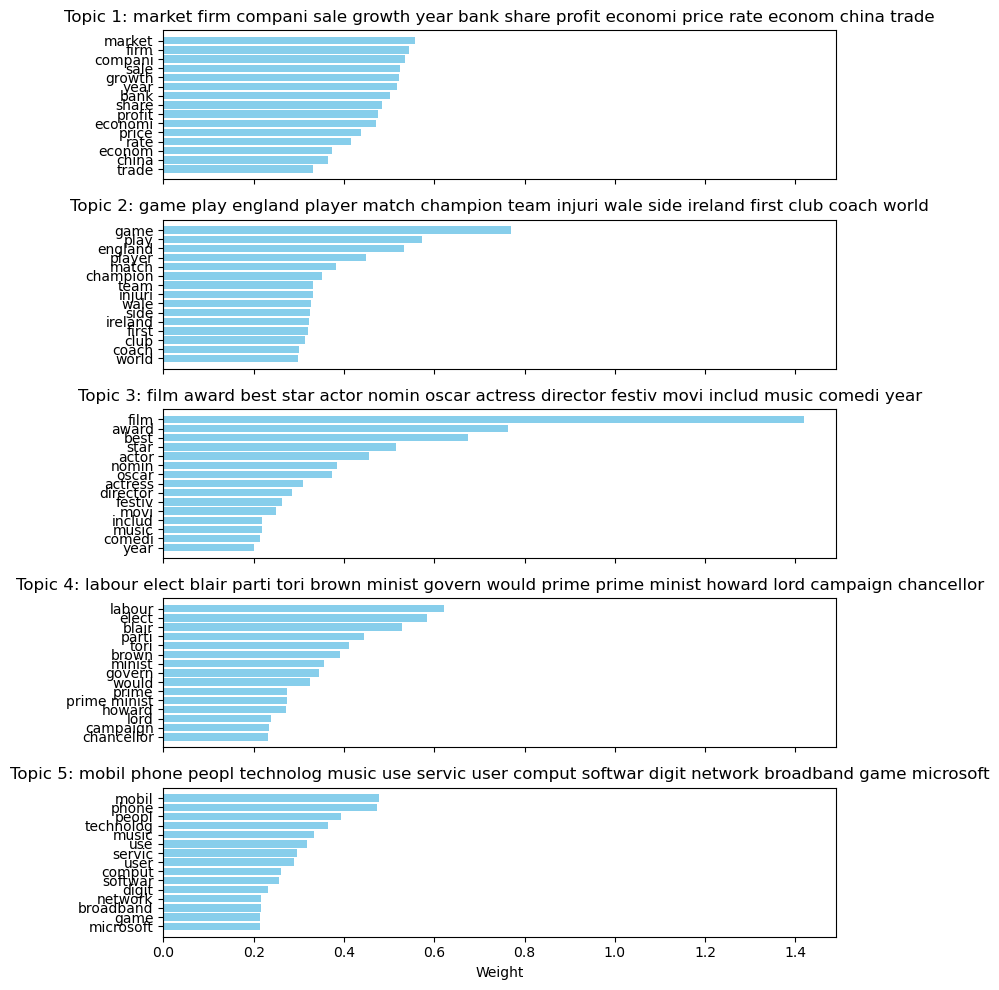

In [21]:
import matplotlib.pyplot as plt

# Number of topics
num_topics = len(topic_words)

# Create a figure and axis
fig, axes = plt.subplots(num_topics, 1, figsize=(8, num_topics * 2), sharex=True)

# Loop through each topic and plot the top words
for i, (topic, t) in enumerate(zip(topics, topic_words)):
    # Get the corresponding weights for the words in this topic
    word_indices = np.argsort(H1[i])[:-num_words-1:-1]
    top_weights = H1[i][word_indices]
    top_words_list = [vocab[idx] for idx in word_indices]
    
    # Create the bar plot
    axes[i].barh(top_words_list, top_weights, color='skyblue')
    axes[i].set_title(f'Topic {i+1}: {topic}', fontsize=12)
    axes[i].invert_yaxis()  # Invert y axis to have the highest weight on top

# Adjust layout and labels
plt.xlabel('Weight')
plt.tight_layout()
plt.show()


In [22]:
colnames = ['Topic' + str(i) for i in range(clf.n_components)]
docnames = [str(i) for i in range(len(train_df.Text))]
doc_topic_df = pd.DataFrame(np.round(W1, 2), columns = colnames, index = docnames)
significant_topic = np.argmax(doc_topic_df.values, axis = 1)
doc_topic_df['dominant_topic'] = significant_topic

In [23]:
doc_topic_df.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
0,0.07,0.01,0.01,0.01,0.01,0
1,0.14,0.00,0.00,0.00,0.00,0
2,0.07,0.01,0.00,0.05,0.03,0
3,0.00,0.00,0.00,0.00,0.27,4
4,0.10,0.01,0.03,0.00,0.01,0
5,0.00,0.06,0.00,0.07,0.02,3
6,0.00,0.15,0.00,0.00,0.00,1
7,0.00,0.00,0.19,0.03,0.00,2
8,0.13,0.00,0.00,0.00,0.00,0
9,0.02,0.01,0.13,0.01,0.00,2


dominant_topic
1    0.254861
0    0.228472
4    0.193750
3    0.186111
2    0.136806
Name: count, dtype: float64 



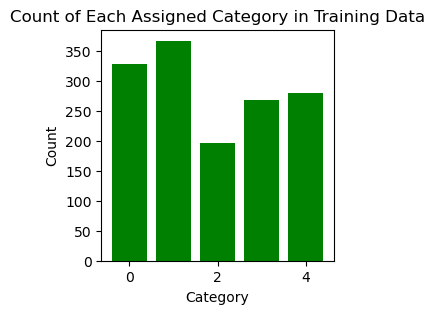

In [24]:
category_counts = doc_topic_df['dominant_topic'].value_counts()
category_prop = category_counts / category_counts.sum()
print(category_prop, '\n')

category_counts_sorted = category_counts.sort_values(ascending=False)

plt.figure(figsize=(3, 3))
plt.bar(category_counts_sorted.index, 
        category_counts_sorted.values, 
        color='green')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Assigned Category in Training Data')
plt.show()

In [25]:
train_df.head(10)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


In [26]:
doc_topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 0 to 1439
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Topic0          1440 non-null   float64
 1   Topic1          1440 non-null   float64
 2   Topic2          1440 non-null   float64
 3   Topic3          1440 non-null   float64
 4   Topic4          1440 non-null   float64
 5   dominant_topic  1440 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 78.8+ KB


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1440 non-null   int64 
 1   Text       1440 non-null   object
 2   Category   1440 non-null   object
dtypes: int64(1), object(2)
memory usage: 45.0+ KB


In [28]:
# Merge train_df and doc_topic_df on the index
combined_df = pd.merge(train_df[['ArticleId', 'Category']], doc_topic_df[['dominant_topic']], left_index=True, right_index=True)

# Check the resulting DataFrame
print(combined_df.head())

Empty DataFrame
Columns: [ArticleId, Category, dominant_topic]
Index: []
